In [ ]:
!pip install openseespy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 70.6 MB/s eta 0:00:00


In [ ]:
!pip install opsvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 1.5 MB/s eta 0:00:00


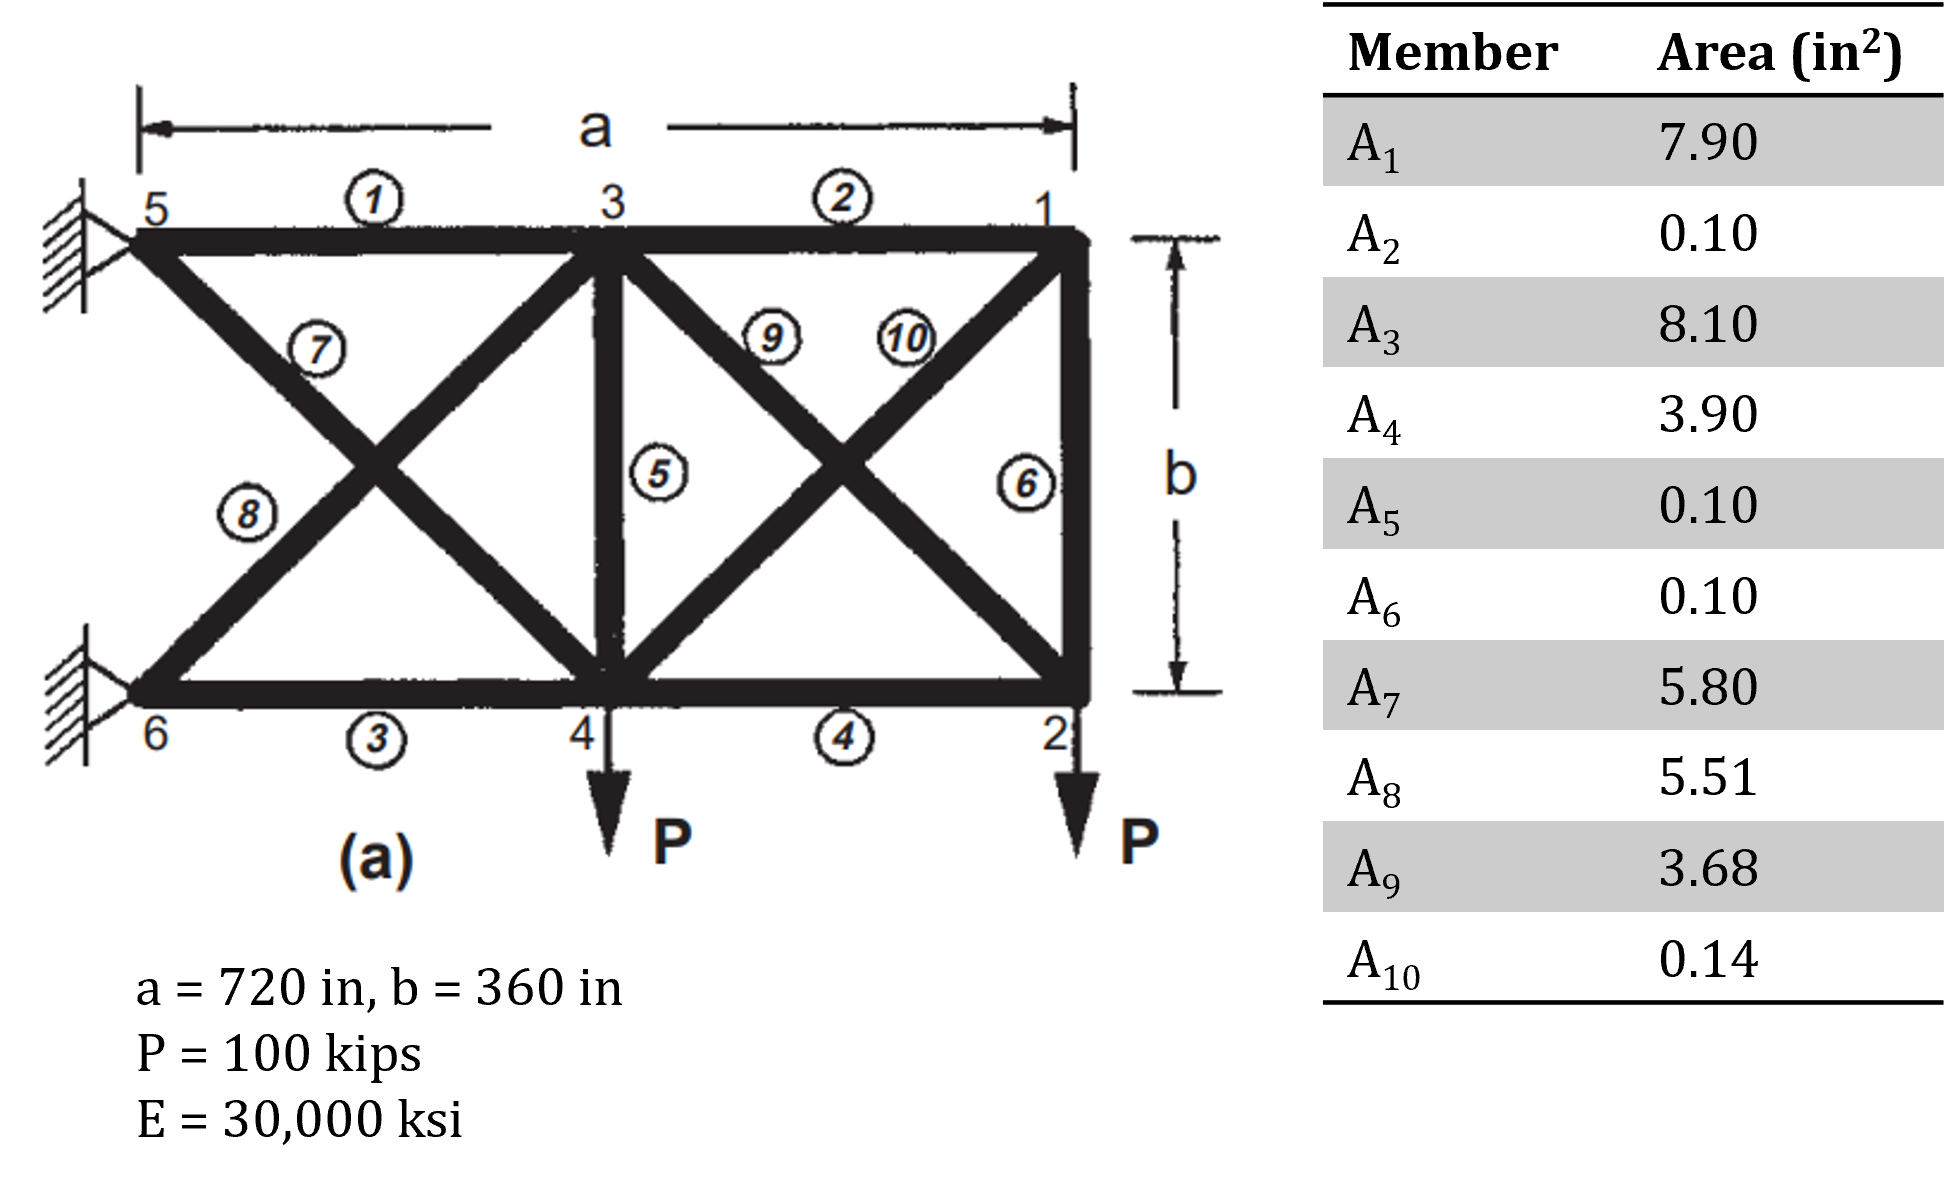

In [ ]:
import openseespy.opensees as op
import opsvis as opsv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define base units
inch = 1.0   # Length
kip = 1.0   # Force
s = 1.0   # time
ksi = kip/inch**2 # stress

lb = 0.001*kip

In [ ]:
# ------------------------------
# Build Model
# ------------------------------

def BuildModel():
  # remove existing model
  op.wipe()

  # set modelbuilder
  # model('basic', '-ndm', ndm, '-ndf', ndf=ndm*(ndm+1)/2)
  op.model('basic','-ndm',2,'-ndf', 2)

  # create nodes
  # node(nodeTag, *crds, '-ndf', ndf, '-mass', *mass, '-disp', *disp, '-vel', *vel, '-accel', *accel)
  a = 720*inch
  b = 360*inch
  op.node(1, a, b)
  op.node(2, a, 0.)
  op.node(3, 0.5*a,  b)
  op.node(4, 0.5*a,  0.)
  op.node(5,  0., b)
  op.node(6,  0., 0.)

  # set boundary condition
  # fix(nodeTag, *constrValues)
  op.fix(5,1,1)
  op.fix(6,1,1)

  # define materials
  # uniaxialMaterial('Elastic', matTag, E, eta=0.0, Eneg=E)
  E = 30000*ksi
  op.uniaxialMaterial('Elastic', 1, E)

  # define Truss elements
  # element('Truss', eleTag, *eleNodes, A, matTag, <'-rho', rho>, <'-cMass', cFlag>, <'-doRayleigh', rFlag>)
  op.element('Truss',1, 5,3, 7.90*inch**2, 1)
  op.element('Truss',2,3,1,0.10*inch**2, 1)
  op.element('Truss',3,6,4,8.10*inch**2, 1)
  op.element('Truss',4,4,2,3.90*inch**2, 1)
  op.element('Truss',5,3,4,0.10*inch**2, 1)
  op.element('Truss',6,2,1,0.10*inch**2, 1)
  op.element('Truss',7,5,4,5.80*inch**2, 1)
  op.element('Truss',8,3,6,5.51*inch**2, 1)
  op.element('Truss',9,3,2,3.68*inch**2, 1)
  op.element('Truss',10,4,1,0.14*inch**2, 1)

In [ ]:
BuildModel()

Text(0.5, 1.0, 'plot_model before defining loads')

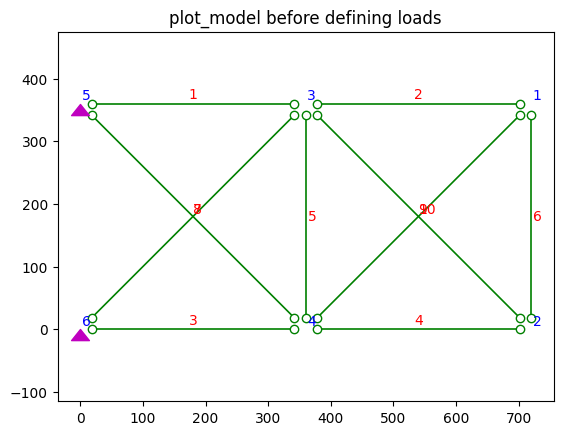

In [ ]:

opsv.plot_model(truss_node_offset = 0.95)
plt.title('plot_model before defining loads')

In [ ]:
# ------------------------------
# Define Loads
# ------------------------------

# create TimeSeries
op.timeSeries('Linear', 1)

# create a plain load pattern
# pattern(patternType, patternTag, *patternArgs)
op.pattern('Plain', 1, 1)

# Create the nodal load - command: load nodeID xForce yForce
P = 100*kip
# load(nodeTag, *loadValues)
op.load(4, 0,-P)
op.load(2, 0,-P)


In [ ]:
# ------------------------------
# Define Analysis Information
# ------------------------------

# create SOE
op.system("BandSPD")

# create DOF numberer
op.numberer("RCM")

# create constraint handler
op.constraints("Plain")

# create integrator
op.integrator("LoadControl", 1.0)

# create algorithm
op.algorithm("Linear")

# create analysis object
op.analysis("Static")

# perform the analysis
op.analyze(1)


0

Text(0.5, 1.0, 'Axial force distribution')

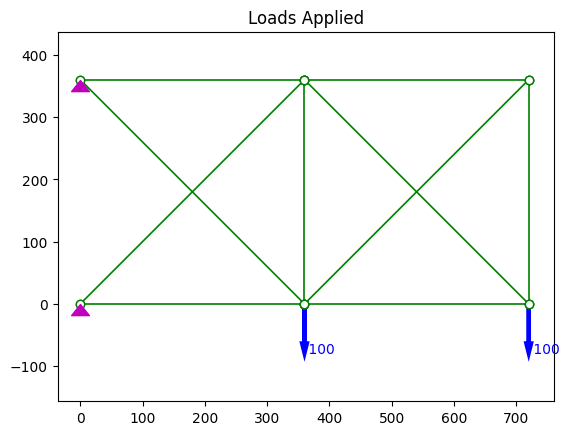

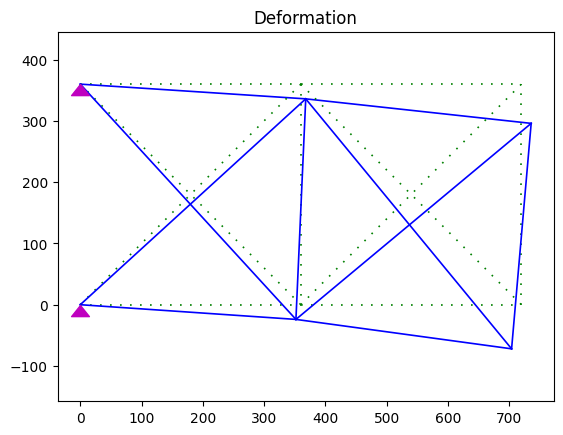

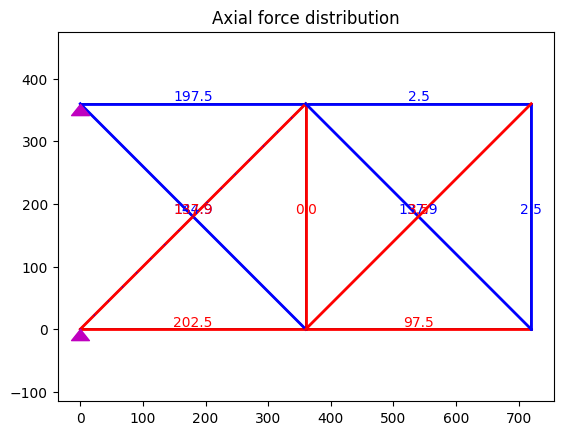

In [ ]:
# ------------------------------
# Create some plots
# ------------------------------

# plot Loads
opsv.plot_loads_2d()
plt.title('Loads Applied')

# plot deformation
opsv.plot_defo()
plt.title('Deformation')

# plot axial force diagram
opsv.section_force_diagram_2d('N',  5.e-5)
plt.title('Axial force distribution')


In [ ]:
# ------------------------------
# Create some plots
# ------------------------------

# eleForce(eleTag, dof=-1)
print(f'The forces at element 1 are: {op.eleForce(1)}')

# basicForce(eleTag)
print(f'The axial force at element 2 is:{op.basicForce(2)}')

# nodeDisp(nodeTag, dof=-1)
print(f'The nodal displacemnt of node 2 along x is : {op.nodeDisp(2,1)}')

The forces at element 1 are: [-197.50505851523803, -0.0, 197.50505851523803, 0.0]
The axial force at element 2 is:[2.4878920748598574]
The nodal displacemnt of node 2 along x is : -0.6000297610576286
